<a href="https://colab.research.google.com/github/hemanth346/eva4/blob/master/S15A/Depth_DataStats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# https://stackoverflow.com/a/55921768
# !date
!rm /etc/localtime
!ln -s /usr/share/zoneinfo/Asia/Calcutta /etc/localtime
# !date

In [2]:
!nvidia-smi

Sun May 10 22:26:18 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
# from google.colab import drive
# drive.mount('drive')
#### Done from sidepane

In [0]:
import os
import cv2
import matplotlib.pyplot as plt

In [4]:
! ls '/content/drive/My Drive/DL/DepthModel/Dataset'

annotations.txt  depth_maps  fg_bg  fg_bg_masks  inp_bg  inp_fg  inp_fg_masks


In [0]:
data_dir = os.path.join('/content/drive/My Drive/DL/DepthModel', 'Dataset')
# Images scrapped from internet 
# required inputs
# fg = Foreground
# bg - background
bg_dir = os.path.join(data_dir, 'inp_bg')
fg_dir = os.path.join(data_dir, 'inp_fg')
# can be generated using alpha channel thresholding of fg images
mask_dir = os.path.join(data_dir, 'inp_fg_masks')
# generated using given inputs
fg_bg_dir = os.path.join(data_dir, 'fg_bg')
fg_bg_mask_dir = os.path.join(data_dir, 'fg_bg_masks')
depth_dir = os.path.join(data_dir, 'depth_maps')

# others
annot_file = os.path.join(data_dir, 'annotations.txt')
log_file = os.path.join('/content/drive/My Drive/DL/DepthModel', 'timer.log')

# generate archive parallelly
compressed_dir = os.path.join('/content/drive/My Drive/DL/DepthModel', 'Compressed_Dataset')
compressed_fg_bg = os.path.join(compressed_dir, 'fg_bg')
compressed_fg_bg_mask = os.path.join(compressed_dir, 'fg_bg_masks')
compressed_depth_dir = os.path.join(compressed_dir, 'depth_maps')

In [0]:
from pathlib import Path

Path(fg_bg_dir).mkdir(exist_ok=True)
Path(fg_bg_mask_dir).mkdir(exist_ok=True)
Path(depth_dir).mkdir(exist_ok=True)

Path(compressed_fg_bg).mkdir(parents=True, exist_ok=True)
Path(compressed_fg_bg_mask).mkdir(parents=True, exist_ok=True)
Path(compressed_depth_dir).mkdir(parents=True, exist_ok=True)


In [7]:
len(os.listdir(fg_bg_dir)), len(os.listdir(fg_bg_mask_dir)), len(os.listdir(depth_dir))

(52, 52, 52)

In [8]:
len(os.listdir(depth_dir+'/office34/'))

4000

# Generate horizontal plot of images

In [0]:
def show_images_hoizontal(fname, root=bg_dir, start=0, number=15, cmap=False):
  fig, ax = plt.subplots(nrows=1, ncols=number, sharex=True,sharey=True, figsize=(70, 40))
  axes = ax.flatten()
  for idx, file in enumerate(os.listdir(root)[start:start+number]):
    abspath = os.path.join(root, file)
    img = cv2.imread(abspath, -1)
    img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_CUBIC)
    axes[idx].imshow(img)
  plt.xticks([])
  plt.yticks([])
  plt.axis('off')
  if cmap:
    print('Using cmap Greys')
    fig.savefig(fname+'.png',cmap='Greys')
  else:
    fig.savefig(fname+'.png')

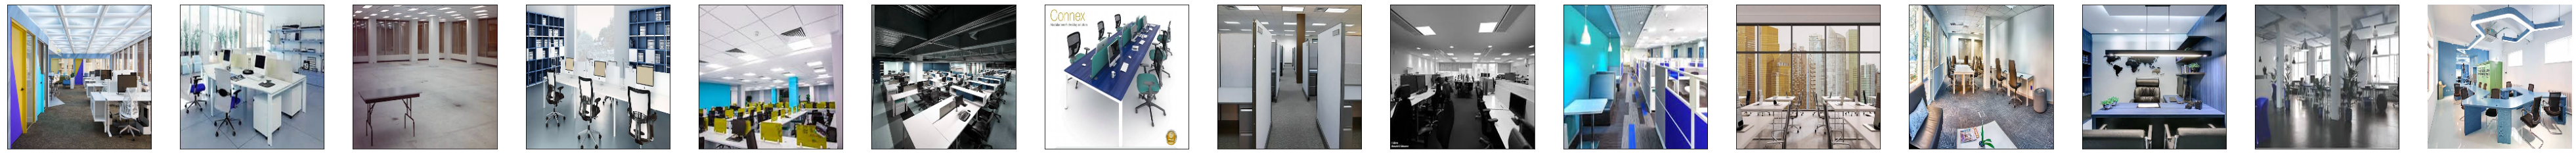

In [29]:
show_images_hoizontal('bg', bg_dir)

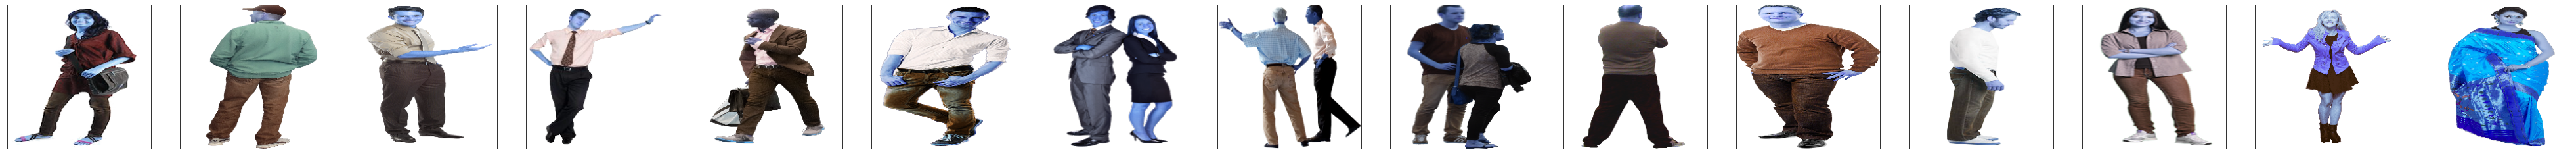

In [23]:
show_images_hoizontal('fg', fg_dir)

Using cmap Greys


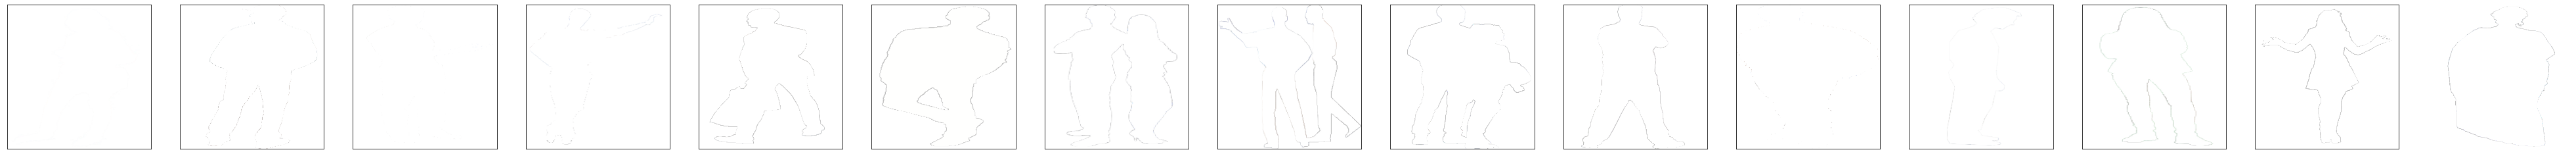

In [24]:
show_images_hoizontal('fg_masks', mask_dir, cmap=True)

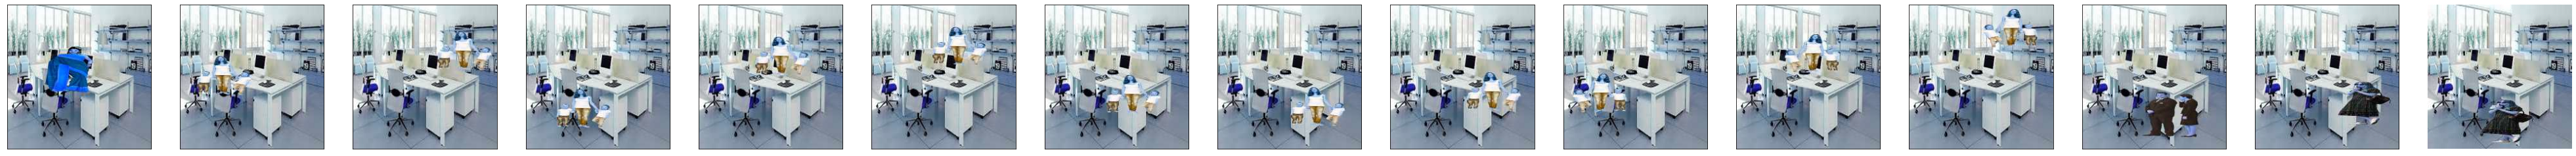

In [58]:
show_images_hoizontal('fg_bg1', fg_bg_dir+'/office2')#, start=200)

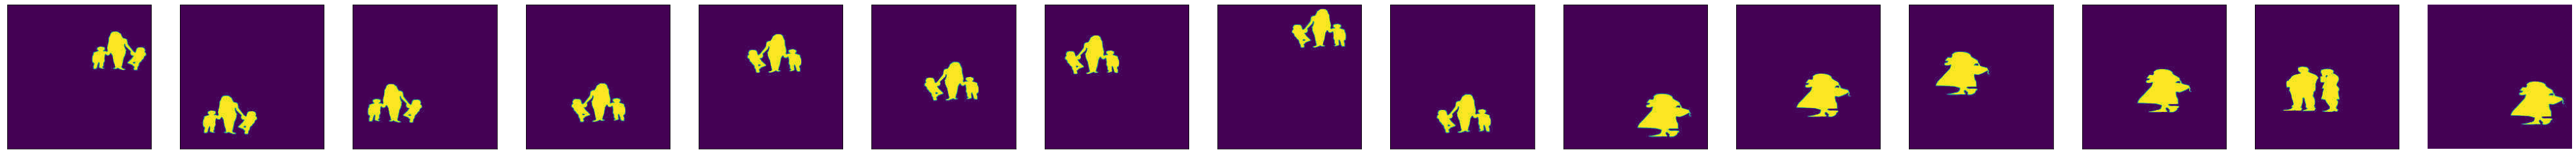

In [59]:
show_images_hoizontal('fg_bg_mask1', fg_bg_mask_dir+'/office2')#, start=200)

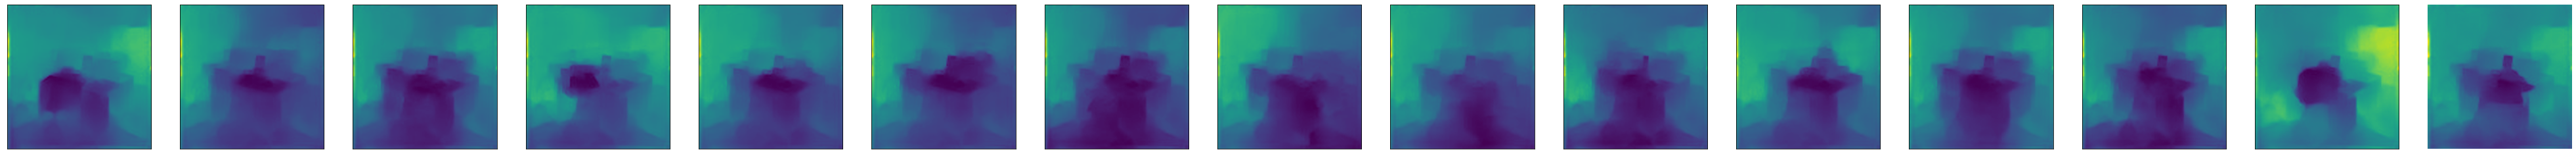

In [61]:
show_images_hoizontal('fg_bg_depth1', depth_dir+'/office2')#, start=200)

In [40]:
os.listdir(depth_dir+'/office36')[:10]

['office36__flip_person89_1.jpg',
 'office36__flip_person89_2.jpg',
 'office36__flip_person89_3.jpg',
 'office36__flip_person89_4.jpg',
 'office36__flip_person89_5.jpg',
 'office36__flip_person89_6.jpg',
 'office36__flip_person89_7.jpg',
 'office36__flip_person89_8.jpg',
 'office36__flip_person89_9.jpg',
 'office36__flip_person89_10.jpg']

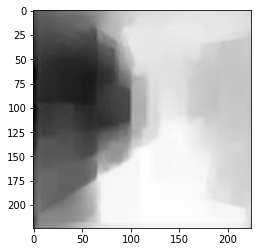

In [46]:
pth = depth_dir+'/office36/office36__flip_person89_1.jpg'
img = cv2.imread(pth,-1)
img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_CUBIC)
plt.imshow(img,cmap='Greys')

In [0]:
fig, ax = plt.subplots(nrows=1, ncols=15, sharex=True,sharey=True, figsize=(70, 40))
axes = ax.flatten()
for idx, file in enumerate(os.listdir(depth_dir+'/office36')[:15]):
  abspath = os.path.join(depth_dir+'/office36', file)
  img = cv2.imread(abspath)
  axes[idx].imshow(img)
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.savefig()

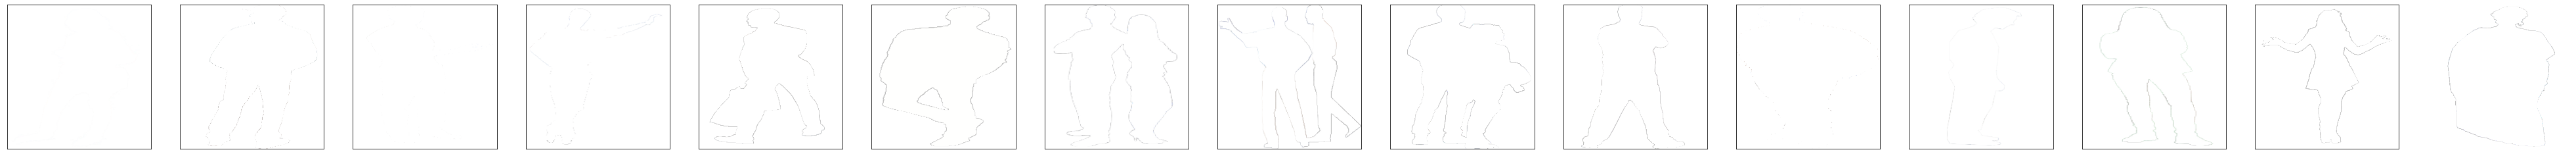

In [18]:
fname='fg1'
root=mask_dir
number=15
fig, ax = plt.subplots(nrows=1, ncols=number, sharex=True,sharey=True, figsize=(70, 40))
axes = ax.flatten()
for idx, file in enumerate(os.listdir(root)[:number]):
  abspath = os.path.join(root, file)
  img = cv2.imread(abspath, -1)
  img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_CUBIC)
  axes[idx].imshow(img)
plt.xticks([])
plt.yticks([])
plt.axis('off')
fig.savefig(fname+'.png', cmap='Greys')

In [0]:
if log_file:
  import logging
  logger = logging.getLogger()
  log = logging.FileHandler(log_file)
  log.setLevel(logging.DEBUG)
  template = logging.Formatter('%(asctime)s : %(message)s')
  log.setFormatter(template)
  logger.addHandler(log)

In [0]:
# adding Depth maps

In [0]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [0]:
! git clone https://github.com/hemanth346/DenseDepth.git

Cloning into 'DenseDepth'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 244 (delta 4), reused 7 (delta 2), pack-reused 235
Receiving objects: 100% (244/244), 11.80 MiB | 38.72 MiB/s, done.
Resolving deltas: 100% (119/119), done.


In [0]:
cd DenseDepth/

/content/DenseDepth


In [0]:
!wget https://s3-eu-west-1.amazonaws.com/densedepth/nyu.h5 -O nyu.h5

--2020-05-10 02:06:22--  https://s3-eu-west-1.amazonaws.com/densedepth/nyu.h5
Resolving s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)... 52.218.106.195
Connecting to s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)|52.218.106.195|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 172897376 (165M) [application/h5]
Saving to: ‘nyu.h5’

nyu.h5              100%[===================>] 164.89M  21.8MB/s    in 8.5s    

2020-05-10 02:06:31 (19.4 MB/s) - ‘nyu.h5’ saved [172897376/172897376]



In [0]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '5'
import os
import glob
from keras.models import load_model
from matplotlib import pyplot as plt

from layers import BilinearUpSampling2D
from utils import predict_single_file

Using TensorFlow backend.


In [0]:
# Custom object needed for inference and training
custom_objects = {'BilinearUpSampling2D': BilinearUpSampling2D, 'depth_loss_function': None}

# Load model into GPU / CPU
model = load_model('nyu.h5', custom_objects=custom_objects, compile=False)

In [0]:
# random overlay on Bg

In [0]:
import os
import cv2
import random
import matplotlib.pyplot as plt
import timeit
import datetime
def overlay(bg, fg, mask, number=20, save=False, name='filename', 
            fg_bg_dir=fg_bg_dir, fg_bg_mask_dir=fg_bg_mask_dir, 
            bbox_file=None, depth_dir=None, show=False):
    """
    Given a Background and Foreground images with alphachannel(flag -1 in cv2.imread)
    place foregroung on top of background randomly given number of times
    
    Also place corresponding mask on a black canvas, to match the fg placement
    """
    if fg[:, :, 3] is None:
        print('No alpha channel detected in FG image')
        return 1
    
    # To stop fg from overshooting bg canvas
    x_offset_limit = bg.shape[1] - fg.shape[1]
    y_offset_limit = bg.shape[0] - fg.shape[0]

    
    # width - X axis starting points from left
    x_offsets = random.sample(range(1, x_offset_limit), 20)

    # height - Y axis starting points from top
    y_offsets = random.sample(range(1, y_offset_limit), 20)
    
    for num, (x_offset, y_offset) in enumerate(zip(x_offsets, y_offsets)):
        # extracting only file name irrespective of extension, if given
        fname = os.path.splitext(name)[0]+'_'+str(num+1)

        # BBOX coord - (x1, y1) and (x2, y2)
        y1, y2 = y_offset, y_offset + fg.shape[0]
        x1, x2 = x_offset, x_offset + fg.shape[1]

        alpha_fg = fg[:, :, 3] / 255.0
        alpha_bg = 1.0 - alpha_fg
        
        # Not disturbing orignal images
        fg_bg = bg.copy()
        black = bg * np.zeros(bg.shape, dtype=np.int8)
        
        for c in range(0, 3):
            fg_bg[y1:y2, x1:x2, c] = (alpha_fg * fg[:, :, c] +
                                      alpha_bg * fg_bg[y1:y2, x1:x2, c])
            # if mask not None:
            black[y1:y2, x1:x2, c] = (alpha_fg * mask[:, :, c] +
                                          alpha_bg * black[y1:y2, x1:x2, c])
        # convert mask to single channel grayscale
        black = black[:,:,0]
        # cv2.cvtColor(black, cv2.COLOR_BGR2GRAY)
        # # if mask not None:
        # roi = black[y1:y2, x1:x2]
        # print('Shapes : ',roi.shape, mask.shape)
        # fg_mask_roi = cv2.add(roi,mask)
        # black[y1:y2, x1:x2] = fg_mask_roi

        if save:
            # os.mkdir(fg_bg_dir) if not os.path.exists(fg_bg_dir)
            if not os.path.exists(fg_bg_dir):
                os.mkdir(fg_bg_dir) 
            fg_bg_fname = os.path.join(fg_bg_dir, fname+'.jpg')
            # set quality of JPEG to 50. default 95, lowest 0
            cv2.imwrite(fg_bg_fname, fg_bg, [cv2.IMWRITE_JPEG_QUALITY, 50])
            # if mask:
            # os.mkdir(fg_bg_mask_dir) if not os.path.exists(fg_bg_mask_dir)
            if not os.path.exists(fg_bg_mask_dir):
                os.mkdir(fg_bg_mask_dir)
            mask_fname = os.path.join(fg_bg_mask_dir, fname+'.jpg')
            # set quality of JPEG to 30. default 95, lowest 0
            cv2.imwrite(mask_fname, black, [cv2.IMWRITE_JPEG_QUALITY, 30])
            # print('FG_BG shape, FG_BG_mask_shape : ', fg_bg.shape, black.shape)
            if bbox_file:
                # each line will have corresponding bbox
                with open(bbox_file, 'w+') as f:
                    coord = ', '.join(list(map(str, (x1, y1, x2, y2))))
                    f.write(coord+' '+fname)
            if depth_dir:
              depth_img = predict_single_file(fg_bg_fname,model=model)
              if not os.path.exists(depth_dir):
                  os.mkdir(depth_dir)
              depth_fname = os.path.join(depth_dir, fname+'.jpg')
              # set quality of JPEG to 30. default 95, lowest 0
              cv2.imwrite(depth_fname, depth_img, [cv2.IMWRITE_JPEG_QUALITY, 90])


        if show:
            print(f'bbox x1,y1 and x2,y2: ', x1, y1, x2, y2)
            fig, ax = plt.subplots(1, 2, sharex=True, sharey=True)
            axes = ax.flatten()
            axes[0].imshow(fg_bg)
            axes[1].imshow(black)
            plt.show()

In [0]:
import os
import numpy as np
import datetime
import shutil
from tqdm.notebook import tqdm

annot_file = os.path.join(data_dir, 'annotations.txt')
for fname in os.listdir(bg_dir):
    bg_start = datetime.datetime.now()
    abspath = os.path.join(bg_dir, fname)
    bg = cv2.imread(abspath)
    logger.debug('BG Original shape : {0}'.format(bg.shape))
    bg = cv2.resize(bg, (224, 224), interpolation=cv2.INTER_CUBIC)
    logger.debug('Resized BG shape {0}'.format(bg.shape))
    bg_fname = os.path.splitext(fname)[0]
    current_fg_bg_dir = os.path.join(fg_bg_dir, bg_fname)
    current_fg_bg_mask_dir = os.path.join(fg_bg_mask_dir, bg_fname)
    current_depth_dir = os.path.join(depth_dir, bg_fname)
    # create a separate directory for each bg
    Path(current_fg_bg_dir).mkdir(parents=True, exist_ok=True)
    Path(current_fg_bg_mask_dir).mkdir(parents=True, exist_ok=True)
    Path(current_depth_dir).mkdir(parents=True, exist_ok=True)
    for fname in tqdm(os.listdir(fg_dir)):
        # print('File name : ', fname)
        fg_img = os.path.join(fg_dir, fname)
        fg_mask = os.path.join(mask_dir, fname)
        # set flag to -1 to read alpha channels as well
        fg = cv2.imread(fg_img, -1)
        mask = cv2.imread(fg_mask, -1)
        logger.debug('FG, Mask Original shape : {0},{1}'.format(fg.shape, mask.shape))
        # could've sent this inside overlay and resize mask randomly as well 20 times
        fg = cv2.resize(fg, (100, 70), interpolation=cv2.INTER_AREA)
        mask = cv2.resize(mask, (100, 70), interpolation=cv2.INTER_AREA)
        # print('FG, Mask resized shape',fg.shape, mask.shape)
        start = datetime.datetime.now()
        # print('Time for resizes : {0}'.format(start - bg_start))        
        overlay(bg=bg, fg=fg, mask=mask,
                name=bg_fname+'__'+fname,  
                fg_bg_dir=current_fg_bg_dir, 
                fg_bg_mask_dir=current_fg_bg_mask_dir,
                depth_dir=current_depth_dir, bbox_file=annot_file,
                number=20, save=True, show=False)
        # flip images and overlay them
        # https://note.nkmk.me/en/python-opencv-numpy-rotate-flip/
        logger.info('Time for overlay before flip: {0}'.format(
            datetime.datetime.now() - start
            ))
        start = datetime.datetime.now()
        fg_flip = cv2.flip(fg, flipCode=1)
        mask_flip = cv2.flip(mask, flipCode=1)
        # Added additional names at the beginning
        # at the end it will be removed while spliting file extension
        overlay(bg=bg, fg=fg_flip, mask=mask_flip,
                name=bg_fname+'__flip_'+fname, 
                fg_bg_dir=current_fg_bg_dir, 
                fg_bg_mask_dir=current_fg_bg_mask_dir,
                depth_dir=current_depth_dir, bbox_file=annot_file,
                number=20, save=True, show=False)
        logger.info('Time for overlay after flip: {0}'.format(
            datetime.datetime.now() - start
            ))
        # print('-'*27)
        # break
    print('Archiving... ')
    start = datetime.datetime.now()
    shutil.make_archive(os.path.join(compressed_fg_bg, bg_fname), 'zip', current_fg_bg_dir)
    shutil.make_archive(os.path.join(compressed_fg_bg_mask, bg_fname), 'zip', current_fg_bg_mask_dir)
    shutil.make_archive(os.path.join(compressed_depth_dir, bg_fname), 'zip', current_depth_dir)
    logger.info('Time for archiving {0}'.format(
        datetime.datetime.now() - start
        ))
    logger.debug('*'*27)
    logger.debug('Time for BG {0} : {1}'.format(
        abspath,
        datetime.datetime.now() - bg_start
        ))
    print('*'*27)
    print('Time for BG {0} : {1}'.format(
        abspath,
        datetime.datetime.now() - bg_start
        ))


Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office2.jpeg : 0:07:20.176832



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office3.jpeg : 0:04:11.511746



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office4.jpeg : 0:04:06.352772



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office5.jpeg : 0:04:05.658024



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office6.jpeg : 0:04:21.665663



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office7.jpeg : 0:04:06.062822



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office8.jpeg : 0:04:06.365885



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office9.jpeg : 0:04:04.196988



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office10.jpeg : 0:04:08.078009



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office11.jpeg : 0:04:05.052992



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office12.jpeg : 0:04:06.535500



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office13.jpeg : 0:04:08.302522



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office14.jpeg : 0:04:07.712675



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office15.jpeg : 0:04:09.196789



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office16.jpeg : 0:04:13.086819



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office17.jpeg : 0:04:15.246814



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office18.jpeg : 0:04:11.904132



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office19.jpeg : 0:04:13.840131



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office20.jpeg : 0:04:10.805135



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office21.jpeg : 0:04:09.115711



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office22.jpeg : 0:04:14.586087



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office23.jpeg : 0:04:12.615975



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office24.jpeg : 0:04:14.100704



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office25.jpeg : 0:04:14.327058



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office26.jpeg : 0:04:10.302049



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office27.jpeg : 0:04:12.750239



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office28.jpeg : 0:04:30.217229



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office29.jpeg : 0:04:14.429606



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office30.jpeg : 0:04:16.025961



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office31.jpeg : 0:04:11.172329



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office32.jpeg : 0:04:09.361908



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office33.jpeg : 0:04:09.853680



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office34.jpeg : 0:04:11.033820



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office35.jpeg : 0:04:11.118267



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office36.jpeg : 0:04:27.322369



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office37.jpeg : 0:04:13.698802



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office38.jpeg : 0:04:16.273136



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office39.jpeg : 0:04:13.482295



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office40.jpeg : 0:04:16.998724



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office41.jpeg : 0:04:15.610359



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office42.jpeg : 0:04:12.485596



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office43.jpeg : 0:04:16.411802



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office44.jpeg : 0:04:20.114186



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office45.jpeg : 0:04:17.344089



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office46.jpeg : 0:04:12.767273



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office47.jpeg : 0:04:15.637697



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office48.jpeg : 0:04:14.820206



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office49.jpeg : 0:04:16.622800



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office50.jpeg : 0:04:19.493222



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office51.jpeg : 0:04:16.454859



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office52.jpeg : 0:04:16.513040



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office53.jpeg : 0:04:16.968307



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office54.jpeg : 0:04:14.927774



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office55.jpeg : 0:05:08.132287



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office56.jpeg : 0:04:20.222688



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office57.jpeg : 0:04:19.644898



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office58.jpeg : 0:04:17.236617



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office59.jpeg : 0:04:19.573856



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office60.jpeg : 0:04:18.675448



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office61.jpeg : 0:04:26.089115



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office62.jpeg : 0:04:22.850520



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office63.jpeg : 0:04:22.797263



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office64.jpeg : 0:04:25.873705



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office65.jpeg : 0:04:27.718240



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office66.jpeg : 0:04:27.432974



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office67.jpeg : 0:04:31.276908



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office68.jpeg : 0:04:27.573736



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office69.jpeg : 0:04:28.644281



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office70.jpeg : 0:04:34.602789



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office71.jpeg : 0:04:46.979697



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office72.jpeg : 0:04:41.936810



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office73.jpeg : 0:04:34.656208



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office74.jpeg : 0:04:31.400961



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office75.jpeg : 0:04:29.264933



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office76.jpeg : 0:04:32.307797



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office77.jpeg : 0:04:30.166894



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office78.jpeg : 0:04:33.719238



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office79.jpeg : 0:04:32.605001



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office80.jpeg : 0:04:39.085284



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office81.jpeg : 0:04:35.540726



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office82.jpeg : 0:04:39.423409



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office83.jpeg : 0:04:41.210402



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office84.jpeg : 0:04:44.190008



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office85.jpeg : 0:04:47.001228



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office86.jpeg : 0:04:47.147384



Archiving... 
***************************
Time for BG /content/drive/My Drive/DL/DepthModel/Dataset/inp_bg/office87.jpeg : 0:04:37.148648



Archiving... 
